In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Uploading data and cleaning
draftdata = pd.read_csv('masterlist.csv', header = 0)
draftdata = draftdata.drop(labels = ['DT', 'FrRnd'], axis = 1)
#draftdata.replace(to_replace = np.nan, value = 0, inplace = True)
cba = [None] * len(draftdata)
teamlist = [None] * len(draftdata)
for i in range(0, len(draftdata)):
    year = draftdata['Year'][i]
    if year < 2012:
        cba[i] = 1
    elif year < 2017:
        cba[i] = 2
    else:
        cba[i] = 3
    team = draftdata['Team'][i].split()
    if team[0] == 'Devil':
        teamlist[i] = 'Rays'
    elif team[0] in ['Blue', 'White', 'Red']:
        teamlist[i] = team[0] + ' ' + team[1]
    else:
        teamlist[i] = team[0]
draftdata['CBA'] = cba
draftdata['Team'] = teamlist
draftdata.shape

(8080, 23)

In [3]:
#Giving JD Underwood a Position (Was previously Nan)
draftdata[draftdata['Position'].isnull()]
draftdata['Position'][4255] = 'RHP'
draftdata['Position'][4255]
#Modifying position for position to deal with generic "IF"
draftdata[draftdata['Position'] == 'IF']
draftdata['Position'][1815] = 'OF'
draftdata['Position'][2617] = '2B'
draftdata[draftdata['Position'] == 'IF']
#Other Position Issues
draftdata = draftdata.replace(to_replace = {'inf': 'INF', 'RHp': 'RHP', 'c': 'C'})

C:\Users\eli\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\eli\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\eli\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
#Breaking out States
states = ['Unknown'] * len(draftdata)
df = pd.DataFrame()
for i in range(len(draftdata)):
    draftedfrom = draftdata['DraftedFrom'][i]
    if draftedfrom is not np.nan:
        draft_list = draftedfrom.split()
        last = draft_list[-1]
        state = last[:2]
        states[i] = state
    else:
        df = df.append(draftdata.loc[i])
draftdata['State'] = states
draftdata[draftdata['State'] == 'Unknown']

,Year,Round,OverallPick,RoundPick,Team,Signed,Name,Position,WAR,GamesBatted,...,GamesPitched,Wins,Losses,ERA,WHIP,Saves,Type,DraftedFrom,CBA,State
52,2007,1s,53,53,Reds,Y,*Kyle Lotzkar (minors),RHP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Unknown
121,2007,11,362,28,Twins,Y,Andrew Schmiesing (minors),OF,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Unknown
144,2007,12,385,21,Blue Jays,Y,Steven Condotta (minors),SS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Unknown
175,2007,13,416,22,Dodgers,Y,Bobby Blevins (minors),RHP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Unknown
229,2007,15,470,16,Rangers,Y,Hector Nelo (minors),RHP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Unknown
270,2007,16,511,27,Tigers,Y,Mark Brackman (minors),RHP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Unknown
422,2007,20,633,29,Mets,Y,Dylan Owen (minors),RHP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Unknown
515,2007,6,186,2,Royals,Y,Fernando Cruz (minors),SS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Unknown
538,2007,6,209,25,White Sox,Y,Johnnie Lowe (minors),RHP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Unknown
597,2007,8,268,24,Angels,Y,Trevor Reckling (minors),LHP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Unknown


In [5]:
#Adding in States for Players with State = Unknown
draftdata['DraftedFrom'][52] = 'South Delta Secondary (Tsawwassen BC)'
draftdata['State'][52] = 'BC'
draftdata['Type'][52] = 'HS'
draftdata['DraftedFrom'][121] = 'St. Olaf College (Northfield MN)'
draftdata['State'][121] = 'MN'
draftdata['Type'][121] = '4Yr'
draftdata['DraftedFrom'][144] = 'Florida Institute of Technology (Melbourne FL)'
draftdata['State'][144] = 'FL'
draftdata['Type'][144] = '4Yr'
draftdata['DraftedFrom'][175] = 'Le Moyne College (Syracuse NY)'
draftdata['State'][175] = 'NY'
draftdata['Type'][175] = '4Yr'
draftdata['DraftedFrom'][229] = 'St. Thomas University (Miami Gardens FL)'
draftdata['State'][229] = 'FL'
draftdata['Type'][229] = '4Yr'
draftdata['DraftedFrom'][270] = 'William Jewell College (Liberty MO)'
draftdata['State'][270] = 'MO'
draftdata['Type'][270] = '4Yr'
draftdata['DraftedFrom'][422] = 'Francis Marion University (Florence SC)'
draftdata['State'][422] = 'SC'
draftdata['Type'][422] = '4Yr'
draftdata['DraftedFrom'][515] = 'Puerto Rico Advance College HS (Bayamon Puerto Rico)'
draftdata['State'][515] = 'PR'
draftdata['Type'][515] = 'HS'
draftdata['DraftedFrom'][538] = 'Point Loma Nazarene University (San Diego CA)'
draftdata['State'][538] = 'CA'
draftdata['Type'][538] = '4Yr'
draftdata['DraftedFrom'][597] = "St. Benedict's Preparatory School (Newark NJ)"
draftdata['State'][597] = 'NJ'
draftdata['Type'][597] = 'HS'
draftdata['DraftedFrom'][803] = 'South County HS (Lorton VA)'
draftdata['State'][803] = 'VA'
draftdata['Type'][803] = 'HS'
draftdata['DraftedFrom'][943] = 'University of Nebraska-Omaha (Omaha NE)'
draftdata['State'][943] = 'NE'
draftdata['Type'][943] = '4Yr'
draftdata['DraftedFrom'][1267] = 'University of Missouri (Columbia MO)'
draftdata['State'][1267] = 'MO'
draftdata['Type'][1267] = '4Yr'
draftdata['DraftedFrom'][1299] = 'California State University, Fresno (Fresno CA)'
draftdata['State'][1299] = 'CA'
draftdata['Type'][1299] = '4Yr'
draftdata['DraftedFrom'][1378] = 'Huertas Junior College (Caguas PR)'
draftdata['State'][1378] = 'PR'
draftdata['Type'][1378] = 'JC'
draftdata['DraftedFrom'][2339] = 'University of Kentucky (Lexington KY)'
draftdata['State'][2339] = 'KY'
draftdata['Type'][2339] = '4Yr'
draftdata['DraftedFrom'][3117] = 'Dakota State University (Madison SD)'
draftdata['State'][3117] = 'SD'
draftdata['Type'][3117] = '4Yr'
draftdata['DraftedFrom'][3264] = 'NO SCHOOL (Toronto CA)'
draftdata['State'][3264] = 'CA'
draftdata['Type'][3264] = 'Unk'
draftdata['DraftedFrom'][3576] = 'NO SCHOOL (Cuba)'
draftdata['State'][3576] = 'CU'
draftdata['Type'][3576] = 'Unk'
draftdata['DraftedFrom'][4386] = 'Louisiana State University (Baton Rouge LA)'
draftdata['State'][4386] = 'LA'
draftdata['Type'][4386] = '4Yr'
draftdata['DraftedFrom'][5390] = 'International Baseball Academy (Ceiba Puerto Rico)'
draftdata['State'][5390] = 'PR'
draftdata['Type'][5390] = 'HS'
draftdata['DraftedFrom'][6043] = 'Turner HS (Kansas City KS)'
draftdata['State'][6043] = 'KS'
draftdata['Type'][6043] = 'HS'
draftdata['DraftedFrom'][6185] = 'International Baseball Academy (Ceiba Puerto Rico)'
draftdata['State'][6185] = 'PR'
draftdata['Type'][6185] = 'HS'
draftdata['DraftedFrom'][6310] = 'Cosby HS (Midlothian VA)'
draftdata['State'][6310] = 'VA'
draftdata['Type'][6310] = 'HS'
draftdata['DraftedFrom'][6796] = 'NO SCHOOL(Hazleton VA)'
draftdata['State'][6796] = 'PA'
draftdata['Type'][6796] = 'Unk'

C:\Users\eli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\eli\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\eli\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd fr

In [6]:
draftdata[draftdata['Signed'] == 'Unk']
draftdata['Signed'][2294] = 'Y'
draftdata['Signed'][2309] = 'Y'
draftdata['Signed'][3471] = 'N'
draftdata['Signed'][4630] = 'Y'
draftdata['Signed'][4729] = 'Y'
draftdata['Signed'][4792] = 'Y'
draftdata['Signed'][5270] = 'Y'
draftdata[draftdata['Signed'] == 'Unk']

C:\Users\eli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\eli\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\eli\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd fr

,Year,Round,OverallPick,RoundPick,Team,Signed,Name,Position,WAR,GamesBatted,...,GamesPitched,Wins,Losses,ERA,WHIP,Saves,Type,DraftedFrom,CBA,State


In [7]:
draftdata.head()

,Year,Round,OverallPick,RoundPick,Team,Signed,Name,Position,WAR,GamesBatted,...,GamesPitched,Wins,Losses,ERA,WHIP,Saves,Type,DraftedFrom,CBA,State
0,2007,1,1,1,Rays,Y,David Price (minors)\priceda01,LHP,39.4,21.0,...,321.0,150.0,80.0,3.31,1.15,0.0,4Yr,Vanderbilt University (Nashville TN),1,TN
1,2007,1,2,2,Royals,Y,Mike Moustakas (minors)\moustmi01,SS,15.3,1131.0,...,NaN,NaN,NaN,NaN,NaN,NaN,HS,Chatsworth HS (Chatsworth CA),1,CA
2,2007,1,3,3,Cubs,Y,Josh Vitters (minors)\vittejo01,3B,-1.3,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,HS,Cypress HS (Cypress CA),1,CA
3,2007,1,4,4,Pirates,Y,Daniel Moskos (minors)\moskoda01,LHP,0.2,30.0,...,31.0,1.0,1.0,2.96,1.56,0.0,4Yr,Clemson University (Clemson SC),1,SC
4,2007,1,5,5,Orioles,Y,Matt Wieters (minors)\wietema01,C,18.2,1148.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4Yr,Georgia Institute of Technology (Atlanta GA),1,GA


In [8]:
#Ri is Puerto Rico, Is is Virgin Islands, Ge is Germany, (BC,QC,AB,ON) in Canada, None needs fixing
#Vermont is only state missing
draftdata['State'] = draftdata['State'].replace(to_replace = {'Ri': 'PR', 'Is':'VI', 'Ge': 'GM'})
draftdata['State'].unique()

array(['TN', 'CA', 'SC', 'GA', 'MO', 'FL', 'IN', 'NC', 'QC', 'ID', 'PA',
       'TX', 'OK', 'AZ', 'AR', 'NJ', 'KY', 'MS', 'IA', 'WA', 'MD', 'VA',
       'OR', 'AL', 'BC', 'OH', 'UT', 'NY', 'MI', 'NH', 'LA', 'PR', 'IL',
       'ON', 'CT', 'MN', 'DC', 'NV', 'KS', 'DE', 'NE', 'NM', 'WV', 'CO',
       'WI', 'ME', 'MA', 'RI', 'HI', 'ND', 'AK', 'AB', 'SD', 'VI', 'WY',
       'MT', 'GM', 'CU'], dtype=object)

In [9]:
#Constructing Regions
region = [None] * len(draftdata)
for i in range(len(draftdata)):
    state = draftdata['State'][i]
    if state is not np.nan:
        if state in ['AB', 'BC', 'ON', 'QC', 'PR', 'GM', 'VI', 'CU']:
            region[i] = 'Non-50 States'
        elif state == 'CA':
            region[i] = 'California'
        elif state in ['WA', 'OR', 'ID', 'MT', 'NV', 'UT', 'AZ', 'NM', 'AK', 'HI']:
            region[i] = 'West'
        elif state in ['ND', 'SD', 'NE', 'KS', 'IA', 'MO', 'OK', 'WY', 'CO', 
                       'WI', 'MI', 'IL', 'IN', 'OH', 'KY', 'WV', 'MN']:
            region[i] = 'Midwest'
        elif state == 'TX':
            region[i] = 'Texas'
        elif state in ['NY', 'CT', 'MA', 'VT', 'NH', 'ME', 'RI', 'PA', 'NJ', 'DE', 'MD', 'DC', 'VA']:
            region[i] = 'East'
        elif state == 'FL':
            region[i] = 'Florida'
        elif state in ['NC', 'SC', 'GA', 'AL', 'MS', 'LA', 'TN', 'AR']:
            region[i] = 'South'
draftdata['Region'] = region

In [10]:
#Creating division column
division = [None] * len(draftdata)
for i in range(len(draftdata)):
    if draftdata['Team'][i] in ['Rays', 'Red Sox', 'Yankees', 'Blue Jays', 'Orioles']:
        division[i] = 'AL East'
    elif draftdata['Team'][i] in ['White Sox', 'Twins', 'Indians', 'Royals', 'Tigers']:
        division[i] = 'AL Central'
    elif draftdata['Team'][i] in ['Astros', 'Angels', 'Mariners', 'Athletics', 'Rangers']:
        division[i] = 'AL West'
    elif draftdata['Team'][i] in ['Mets', 'Nationals', 'Braves', 'Phillies', 'Marlins']:
        division[i] = 'NL East'
    elif draftdata['Team'][i] in ['Reds', 'Cubs', 'Cardinals', 'Brewers', 'Pirates']:
        division[i] = 'NL Central'
    elif draftdata['Team'][i] in ['Dodgers', 'Giants', 'Diamondbacks', 'Rockies', 'Padres']:
        division[i] = 'NL West'
draftdata['Division'] = division

In [11]:
#Positional Group Column
print(draftdata['Position'].unique())
posgroup = ['None'] * len(draftdata)
for i in range(len(draftdata)):
    if draftdata['Position'][i] in ['LHP', 'RHP', 'P']:
        posgroup[i] = 'Pitcher'
    elif draftdata['Position'][i] in ['1B', '2B', '3B', 'SS', 'IF', 'INF']:
        posgroup[i] = 'Infield'
    elif draftdata['Position'][i] in ['LF', 'RF', 'CF', 'OF']:
        posgroup[i] = 'Outfield'
    else:
        posgroup[i] = 'Catcher/Utility'
draftdata['PositionGroup'] = posgroup

['LHP' 'SS' '3B' 'C' '1B' 'RHP' 'OF' '2B' 'INF' 'CF' 'LF' 'RF' 'IF' 'UT'
 'P']


In [12]:
#Removing Supplemental Rounds, and editing a couple of Typos
draftdata_non_supp = draftdata.replace(to_replace = {'1s':'1', '2s':'2', '3s':'3'})
draftdata_non_supp['Round'] = draftdata_non_supp['Round'].astype('int64')

In [13]:
#Breaking out Signed/Unsigned
not_signed = draftdata_non_supp[draftdata_non_supp['Signed'] == 'N']
signed = draftdata_non_supp[draftdata_non_supp['Signed'] == 'Y']

In [14]:
#Breaking out High School Players Subsample
totalhs = draftdata_non_supp[draftdata_non_supp['Type'] == 'HS']
print(totalhs.shape)
not_signed_hs = not_signed[not_signed['Type'] == 'HS']
print(not_signed_hs.shape)
signed_hs = signed[signed['Type'] == 'HS']
print(signed_hs.shape)

(2137, 27)
(463, 27)
(1674, 27)


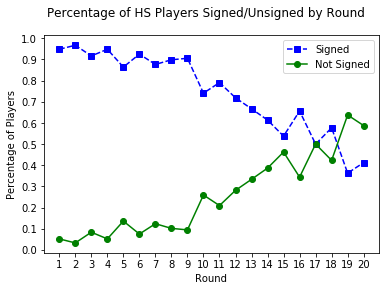

In [15]:
#Graphing Percentage by Round
x = signed_hs.groupby('Round', as_index = False).count().sort_values(['Round'], ascending=True)
y = not_signed_hs.groupby('Round', as_index = False).count().sort_values(['Round'], ascending=True)
total = totalhs.groupby('Round', as_index = False).count().sort_values(['Round'], ascending= True)

plt.plot(x['Round'], x['Signed']/total['Signed'], 's--b', label = 'Signed')
plt.plot(y['Round'], y['Signed']/total['Signed'], 'o-g', label = 'Not Signed')
plt.xlabel('Round')
plt.ylabel('Percentage of Players')
plt.yticks(np.arange(0,1.1, step = 0.1))
plt.xticks(np.arange(1,21))
plt.suptitle('Percentage of HS Players Signed/Unsigned by Round')
plt.legend(loc = 'upper right', fontsize='medium')
plt.show()

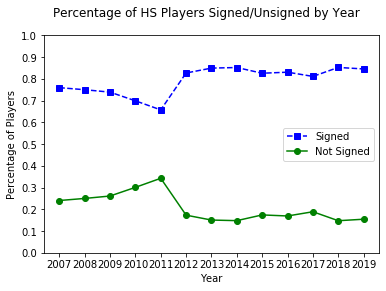

In [16]:
#Graphing Percentage by Year
x = signed_hs.groupby('Year', as_index = False).count().sort_values(['Year'], ascending=True)
y = not_signed_hs.groupby('Year', as_index = False).count().sort_values(['Year'], ascending=True)
total = totalhs.groupby('Year', as_index = False).count().sort_values(['Year'], ascending= True)

plt.plot(x['Year'], x['Signed']/total['Signed'], 's--b', label = 'Signed')
plt.plot(y['Year'], y['Signed']/total['Signed'], 'o-g', label = 'Not Signed')
plt.xlabel('Year')
plt.ylabel('Percentage of Players')
plt.yticks(np.arange(0,1.1, step = 0.1))
plt.xticks(np.arange(2007, 2020))
plt.suptitle('Percentage of HS Players Signed/Unsigned by Year')
plt.legend(loc = 'right', fontsize='medium')
plt.show()

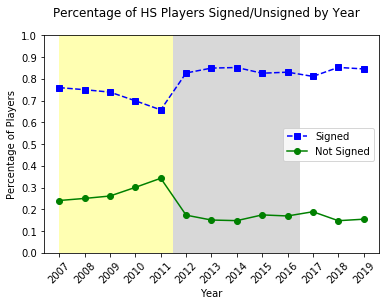

In [31]:
#Graphing Percentage by Year
x = signed_hs.groupby('Year', as_index = False).count().sort_values(['Year'], ascending=True)
y = not_signed_hs.groupby('Year', as_index = False).count().sort_values(['Year'], ascending=True)
total = totalhs.groupby('Year', as_index = False).count().sort_values(['Year'], ascending= True)

plt.axvspan(2007, 2011.5, color='yellow', alpha=0.3, lw=0)
plt.axvspan(2011.5, 2016.5, color='gray', alpha=0.3, lw=0)
plt.plot(x['Year'], x['Signed']/total['Signed'], 's--b', label = 'Signed')
plt.plot(y['Year'], y['Signed']/total['Signed'], 'o-g', label = 'Not Signed')
plt.xlabel('Year')
plt.ylabel('Percentage of Players')
plt.yticks(np.arange(0,1.1, step = 0.1))
plt.xticks(np.arange(2007, 2020), rotation = 45)
plt.suptitle('Percentage of HS Players Signed/Unsigned by Year')
plt.legend(loc = 'right', fontsize='medium')
plt.show()

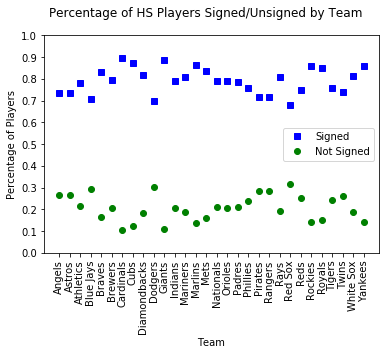

In [18]:
#Graphing Percentage by Team
x = signed_hs.groupby('Team', as_index = False).count().sort_values(['Team'], ascending=True)
y = not_signed_hs.groupby('Team', as_index = False).count().sort_values(['Team'], ascending=True)
total = totalhs.groupby('Team', as_index = False).count().sort_values(['Team'], ascending= True)


plt.plot(x['Team'], x['Signed']/total['Signed'], 'sb', label = 'Signed') #Change shape of points?
plt.plot(y['Team'], y['Signed']/total['Signed'], 'og', label = 'Not Signed')
plt.xlabel('Team')
plt.ylabel('Percentage of Players')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,1.1, step = 0.1))
plt.suptitle('Percentage of HS Players Signed/Unsigned by Team')
plt.legend(loc = 'right', fontsize='medium')
plt.show()

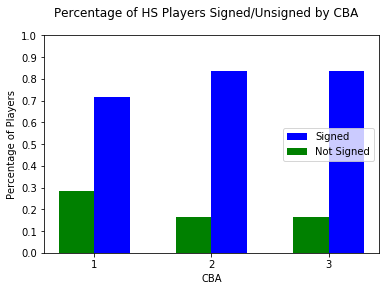

In [19]:
#Graphing Percentage by CBA
x = signed_hs.groupby('CBA', as_index = False).count().sort_values(['CBA'], ascending=True)
y = not_signed_hs.groupby('CBA', as_index = False).count().sort_values(['CBA'], ascending=True)
total = totalhs.groupby('CBA', as_index = False).count().sort_values(['CBA'], ascending= True)


plt.bar(x['CBA'], x['Signed']/total['Signed'], color = 'b', label = 'Signed', width = 0.3, align = 'edge')
plt.bar(y['CBA'], y['Signed']/total['Signed'], color = 'g', label = 'Not Signed', width = -0.3, align = 'edge')
plt.xlabel('CBA')
plt.ylabel('Percentage of Players')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,1.1, step = 0.1))
plt.xticks(np.arange(1,4), rotation = 360)
plt.suptitle('Percentage of HS Players Signed/Unsigned by CBA')
plt.legend(loc = 'right', fontsize='medium')
plt.show()

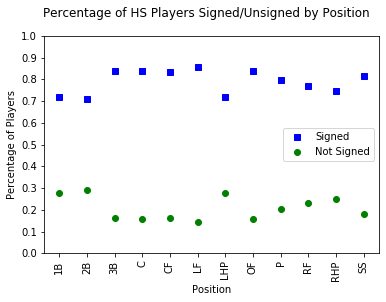

In [20]:
#Graphing Percentage by Position
x = signed_hs.groupby('Position', as_index = False).count().sort_values(['Position'], ascending=True)
y = not_signed_hs.groupby('Position', as_index = False).count().sort_values(['Position'], ascending=True)
total = totalhs.groupby('Position', as_index = False).count().sort_values(['Position'], ascending= True)


plt.plot(x['Position'], x['Signed']/total['Signed'], 'sb', label = 'Signed') #Change shape of points?
plt.plot(y['Position'], y['Signed']/total['Signed'], 'og', label = 'Not Signed')
plt.xlabel('Position')
plt.ylabel('Percentage of Players')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,1.1, step = 0.1))
plt.suptitle('Percentage of HS Players Signed/Unsigned by Position')
plt.legend(loc = 'right', fontsize='medium')
plt.show()

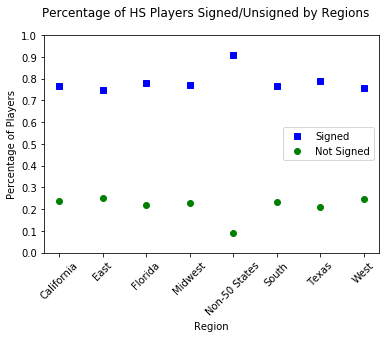

In [21]:
#Graphing Percentage by Region
x = signed_hs.groupby('Region', as_index = False).count().sort_values(['Region'], ascending=True)
y = not_signed_hs.groupby('Region', as_index = False).count().sort_values(['Region'], ascending=True)
total = totalhs.groupby('Region', as_index = False).count().sort_values(['Region'], ascending= True)


plt.plot(x['Region'], x['Signed']/total['Signed'], 'sb', label = 'Signed') #Change shape of points?
plt.plot(y['Region'], y['Signed']/total['Signed'], 'og', label = 'Not Signed')
plt.xlabel('Region')
plt.ylabel('Percentage of Players')
plt.xticks(rotation=45)
plt.yticks(np.arange(0,1.1, step = 0.1))
plt.suptitle('Percentage of HS Players Signed/Unsigned by Regions')
plt.legend(loc = 'right', fontsize='medium')
plt.show()

In [22]:
x['Signed']/total['Signed']

0    0.764398
1    0.748691
2    0.781350
3    0.770492
4    0.910314
5    0.767726
6    0.788360
7    0.755319
Name: Signed, dtype: float64

In [23]:
total

,Region,Year,Round,OverallPick,RoundPick,Team,Signed,Name,Position,WAR,...,Losses,ERA,WHIP,Saves,Type,DraftedFrom,CBA,State,Division,PositionGroup
0,California,382,382,382,382,382,382,382,382,95,...,52,52,51,52,382,382,382,382,382,382
1,East,191,191,191,191,191,191,191,191,22,...,14,14,14,14,191,191,191,191,191,191
2,Florida,311,311,311,311,311,311,311,311,72,...,39,39,39,39,311,311,311,311,311,311
3,Midwest,244,244,244,244,244,244,244,244,49,...,31,31,31,31,244,244,244,244,244,244
4,Non-50 States,223,223,223,223,223,223,223,223,24,...,10,10,10,10,223,223,223,223,223,223
5,South,409,409,409,409,409,409,409,409,83,...,43,43,43,43,409,409,409,409,409,409
6,Texas,189,189,189,189,189,189,189,189,40,...,28,28,28,28,189,189,189,189,189,189
7,West,188,188,188,188,188,188,188,188,38,...,19,19,19,19,188,188,188,188,188,188


In [24]:
draftdata_cleaned = draftdata_non_supp
draftdata_cleaned.to_csv('Cleaned_data.csv')

In [25]:
pd.read_csv('Cleaned_data.csv', index_col = 'Unnamed: 0')

,Year,Round,OverallPick,RoundPick,Team,Signed,Name,Position,WAR,GamesBatted,...,ERA,WHIP,Saves,Type,DraftedFrom,CBA,State,Region,Division,PositionGroup
0,2007,1,1,1,Rays,Y,David Price (minors)\priceda01,LHP,39.4,21.0,...,3.31,1.15,0.0,4Yr,Vanderbilt University (Nashville TN),1,TN,South,AL East,Pitcher
1,2007,1,2,2,Royals,Y,Mike Moustakas (minors)\moustmi01,SS,15.3,1131.0,...,NaN,NaN,NaN,HS,Chatsworth HS (Chatsworth CA),1,CA,California,AL Central,Infield
2,2007,1,3,3,Cubs,Y,Josh Vitters (minors)\vittejo01,3B,-1.3,36.0,...,NaN,NaN,NaN,HS,Cypress HS (Cypress CA),1,CA,California,NL Central,Infield
3,2007,1,4,4,Pirates,Y,Daniel Moskos (minors)\moskoda01,LHP,0.2,30.0,...,2.96,1.56,0.0,4Yr,Clemson University (Clemson SC),1,SC,South,NL Central,Pitcher
4,2007,1,5,5,Orioles,Y,Matt Wieters (minors)\wietema01,C,18.2,1148.0,...,NaN,NaN,NaN,4Yr,Georgia Institute of Technology (Atlanta GA),1,GA,South,AL East,Catcher/Utility
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8075,2019,9,283,26,Brewers,Y,Darrien Miller (minors),C,NaN,NaN,...,NaN,NaN,NaN,HS,Clovis HS (Clovis CA),3,CA,California,NL Central,Catcher/Utility
8076,2019,9,284,27,Athletics,Y,Colin Peluse (minors),P,NaN,NaN,...,NaN,NaN,NaN,4Yr,Wake Forest University (Winston-Salem NC),3,NC,South,AL West,Pitcher
8077,2019,9,285,28,Yankees,Y,Spencer Henson (minors),1B,NaN,NaN,...,NaN,NaN,NaN,4Yr,Oral Roberts University (Tulsa OK),3,OK,Midwest,AL East,Infield
8078,2019,9,286,29,Astros,Y,Peyton Battenfield (minors),P,NaN,NaN,...,NaN,NaN,NaN,4Yr,Oklahoma State University (Stillwater OK),3,OK,Midwest,AL West,Pitcher
